In [23]:
import pandas as pd


In [54]:
df = pd.read_csv('https://drive.google.com/file/d/1jyFCJgbFvdgiP36RP_NcsfVXZzx_mHkd/offical_data.csv/offical_data.csv')

HTTPError: HTTP Error 404: Not Found

In [25]:
df.shape

(14629, 14)

In [26]:
df.info()
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14629 entries, 0 to 14628
Data columns (total 14 columns):
address              14629 non-null object
balcony_direction    8270 non-null object
bedroom              13473 non-null object
direction            7370 non-null object
furniture            8546 non-null object
investor             12456 non-null object
law_doc              4866 non-null object
name                 14629 non-null object
price                14629 non-null object
project              14629 non-null object
square               14162 non-null object
time                 14629 non-null object
toilet               11040 non-null object
types                14629 non-null object
dtypes: object(14)
memory usage: 1.6+ MB


In [27]:
data = df[['name','time', 'address', 'direction', 'square', 'types', 'toilet', 'furniture', 'bedroom','balcony_direction', 'investor', 'project', 'law_doc', 'price' ]].copy()

In [28]:
data.head()

,name,time,address,direction,square,types,toilet,furniture,bedroom,balcony_direction,investor,project,law_doc,price
0,BẢNG GIÁ CĂN HỘ GRAND SAPPHIRE - VINHOMES SMA...,28/09/2020,"Dự án Vinhomes Smart City Đại Mỗ, Phường Tây M...",Đông-Nam,54 m²,Bán căn hộ chung cư,1 (phòng),NaN,2 PN,Đông-Nam,Tập đoàn Vingroup,Vinhomes Smart City Đại Mỗ,NaN,1.6 tỷ
1,CẦN BÁN GẤP 150 CĂN HỘ CC AN BÌNH CITY GIÁ RẺ...,28/09/2020,"Dự án An Bình City, Đường Phạm Văn Đồng, Phườn...",NaN,73 m²,Bán căn hộ chung cư,NaN,"Nội thất nguyên bản CĐT: gồm sàn gỗ, trần thạc...",2 PN,NaN,Công ty CP Xuất nhập khẩu tổng hợp Hà Nội - Ge...,An Bình City,NaN,2.1 tỷ
2,CHÍNH CHỦ NHƯỢNG LẠI CĂN THE ZEI HOT HIT 2PN ...,01/10/2020,"Dự án The Zei Mỹ Đình, Đường Lê Đức Thọ, Phườn...",Tây-Nam,94 m²,Bán căn hộ chung cư,2 (phòng),- Loại hình bàn giao: Bàn giao thô nên KH có t...,2 PN,Đông-Bắc,HD Mon Holdings,The Zei Mỹ Đình,NaN,34.5 triệu/m²
3,NHẬN GIÁ 08 CĂN HỘ ĐẸP VÀ GIÁ TỐT NHẤT TẠI CC...,28/09/2020,"D’. Le Roi Soleil - Quảng An, 02, Đường Đặng T...",Đông-Nam,88 m²,Bán căn hộ chung cư,4 (phòng),Nội thất cơ bản.,3 PN,NaN,Tân Hoàng Minh Group,D’. Le Roi Soleil - Quảng An,Sổ đỏ.,5.35 tỷ
4,RA HÀNG MỘT SỐ CĂN ĐẦU TƯ HOT TẠI DỰ ÁN IMPER...,01/10/2020,"Dự án Imperia Sky Garden, Đường Minh Khai, Phư...",Đông-Bắc,87.4 m²,Bán căn hộ chung cư,2 (phòng),NaN,3 PN,Đông-Bắc,Công ty CP Terra Gold Việt Nam,Imperia Sky Garden,NaN,43 triệu/m²


In [29]:
a = data.iloc[1]['address']
a

'Dự án An Bình City, Đường Phạm Văn Đồng, Phường Cổ Nhuế 1, Bắc Từ Liêm, Hà Nội'

In [30]:
data['district'] = data['address'].apply(lambda x : x.split(', ')[-2: -1 ])


In [31]:
data['district'].describe()

count             14598
unique               22
top       [Nam Từ Liêm]
freq               1967
Name: district, dtype: object

In [32]:
data['district'] = data['district'].astype('str')

In [33]:
data['district'] = data['district'].apply(lambda x : x.replace("['", ""))

In [34]:
data['district'] = data['district'].apply(lambda x : x.replace("']", ""))

In [35]:
data['district'].value_counts()

Nam Từ Liêm            1967
Hà Đông                1847
Thanh Xuân             1707
Cầu Giấy               1571
Bắc Từ Liêm            1515
Hoàng Mai              1406
Tây Hồ                 1061
Hai Bà Trưng            984
Long Biên               840
Thanh Trì               359
Gia Lâm                 357
Ba Đình                 314
Đống Đa                 287
Hoài Đức                243
Đông Anh                 72
Đan Phượng               27
Chương Mỹ                18
Thạch Thất               11
Hoàn Kiếm                 9
Hà Nội                    1
Dự án CT3 Nam Cường       1
                          1
Name: district, dtype: int64

In [36]:
data[(data['district'] == '') | (data['district'] == 'Hà Nội') | (data['district'] == 'Dự án CT3 Nam Cường')] 

,name,time,address,direction,square,types,toilet,furniture,bedroom,balcony_direction,investor,project,law_doc,price,district
301,CHUNG CƯ H9CT1 STARLAKE- TÂY HỒ TÂY_ƯU ĐÃI LỚ...,30/09/2020,"Dự án KĐT Tây Hồ Tây - Starlake Hà Nội, Tây Hồ...",NaN,91 m²,Bán căn hộ chung cư,NaN,Bàn giao full nội thất nhập khẩu Hàn Quốc từ c...,NaN,NaN,Công ty TNHH Phát triển T.H.T,KĐT Tây Hồ Tây - Starlake Hà Nội,NaN,51 triệu/m²,Hà Nội
5900,Chính chủ cần chuyển nhượng gấp căn CC 1PN + ...,01/10/2020,"Dự án Vinhomes Smart City Đại Mỗ, Phường Tây M...",NaN,42.8 m²,Bán căn hộ chung cư,NaN,NaN,1 PN,Đông-Nam,Tập đoàn Vingroup,Vinhomes Smart City Đại Mỗ,Có sổ.,Thỏa thuận,
11586,Chính chủ bán chung cư CT3 Nam Cường Khu đô t...,28/09/2020,"Dự án CT3 Nam Cường, khu đô thị Cổ Nhuế 1",Tây,135 m²,Bán căn hộ chung cư,3 (phòng),NaN,3 PN,Nam,Công ty CP Tập đoàn Nam Cường Hà Nội,CT3 Cổ Nhuế,Sổ đỏ chính chủ,32 triệu/m²,Dự án CT3 Nam Cường


In [15]:
data.drop([301, 5900, 11586], inplace = True)

In [37]:
data[data['price'] == 'Thỏa thuận'].shape[0]

1947

In [38]:
data = data[~data['price'].isin(['Thỏa thuận'])]

In [39]:
data.head()

,name,time,address,direction,square,types,toilet,furniture,bedroom,balcony_direction,investor,project,law_doc,price,district
0,BẢNG GIÁ CĂN HỘ GRAND SAPPHIRE - VINHOMES SMA...,28/09/2020,"Dự án Vinhomes Smart City Đại Mỗ, Phường Tây M...",Đông-Nam,54 m²,Bán căn hộ chung cư,1 (phòng),NaN,2 PN,Đông-Nam,Tập đoàn Vingroup,Vinhomes Smart City Đại Mỗ,NaN,1.6 tỷ,Nam Từ Liêm
1,CẦN BÁN GẤP 150 CĂN HỘ CC AN BÌNH CITY GIÁ RẺ...,28/09/2020,"Dự án An Bình City, Đường Phạm Văn Đồng, Phườn...",NaN,73 m²,Bán căn hộ chung cư,NaN,"Nội thất nguyên bản CĐT: gồm sàn gỗ, trần thạc...",2 PN,NaN,Công ty CP Xuất nhập khẩu tổng hợp Hà Nội - Ge...,An Bình City,NaN,2.1 tỷ,Bắc Từ Liêm
2,CHÍNH CHỦ NHƯỢNG LẠI CĂN THE ZEI HOT HIT 2PN ...,01/10/2020,"Dự án The Zei Mỹ Đình, Đường Lê Đức Thọ, Phườn...",Tây-Nam,94 m²,Bán căn hộ chung cư,2 (phòng),- Loại hình bàn giao: Bàn giao thô nên KH có t...,2 PN,Đông-Bắc,HD Mon Holdings,The Zei Mỹ Đình,NaN,34.5 triệu/m²,Nam Từ Liêm
3,NHẬN GIÁ 08 CĂN HỘ ĐẸP VÀ GIÁ TỐT NHẤT TẠI CC...,28/09/2020,"D’. Le Roi Soleil - Quảng An, 02, Đường Đặng T...",Đông-Nam,88 m²,Bán căn hộ chung cư,4 (phòng),Nội thất cơ bản.,3 PN,NaN,Tân Hoàng Minh Group,D’. Le Roi Soleil - Quảng An,Sổ đỏ.,5.35 tỷ,Tây Hồ
4,RA HÀNG MỘT SỐ CĂN ĐẦU TƯ HOT TẠI DỰ ÁN IMPER...,01/10/2020,"Dự án Imperia Sky Garden, Đường Minh Khai, Phư...",Đông-Bắc,87.4 m²,Bán căn hộ chung cư,2 (phòng),NaN,3 PN,Đông-Bắc,Công ty CP Terra Gold Việt Nam,Imperia Sky Garden,NaN,43 triệu/m²,Hai Bà Trưng


In [40]:
data[['investor']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12651 entries, 0 to 14591
Data columns (total 1 columns):
investor    10825 non-null object
dtypes: object(1)
memory usage: 197.7+ KB


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 14591
Data columns (total 15 columns):
name                 12649 non-null object
time                 12649 non-null object
address              12649 non-null object
direction            6662 non-null object
square               12340 non-null object
types                12649 non-null object
toilet               9815 non-null object
furniture            7538 non-null object
bedroom              11809 non-null object
balcony_direction    7428 non-null object
investor             10823 non-null object
project              12649 non-null object
law_doc              4347 non-null object
price                12649 non-null object
district             12649 non-null object
dtypes: object(15)
memory usage: 1.5+ MB


In [21]:
data['law_doc'].value_counts()

Sổ đỏ chính chủ.                                   376
Sổ đỏ.                                             369
Có sổ                                              261
Đã có sổ đỏ.                                       213
Sổ đỏ chính chủ                                    212
                                                  ... 
Đang đợi sổ đỏ                                       1
Đã có sổ đỏ!                                         1
Pháp lý Văn bản chuyển nhượng hợp đồng mua bán.      1
Đã có đầy đủ giấy tờ pháp lý                         1
Đang hoàn thiện thủ tục làm sổ.                      1
Name: law_doc, Length: 632, dtype: int64

In [44]:
data = data.dropna(axis = 0)

In [45]:
data['square'] = data['square'].apply(lambda x : x.replace(' m²', ''))

In [46]:
data['square'].value_counts()

75       49
70       46
90       38
80       38
83       36
         ..
107.4     1
99.6      1
81.1      1
106.3     1
84.45     1
Name: square, Length: 421, dtype: int64

In [47]:
data['toilet'] = data['toilet'].apply(lambda x : x[0])


In [48]:
data.reset_index(inplace = True)
data.iloc[1891]

index                                                            14301
name                  Chính chủ - bán căn hộ tại CT8A: 62.62m2 2PN ...
time                                                        13/09/2020
address              Dự án Chung cư Đại Thanh, Đường Phan Trọng Tuệ...
direction                                                     Đông-Nam
square                                                           62.62
types                                              Bán căn hộ chung cư
toilet                                                               2
furniture            - Nội thất: Tủ bếp, sàn gỗ, tủ quần áo, bàn ăn...
bedroom                                                           2 PN
balcony_direction                                              Tây-Bắc
investor                      Xí nghiệp Xây dựng Tư nhân Số 1 Lai Châu
project                                             Chung cư Đại Thanh
law_doc                                               Sổ đỏ chính chủ.
price 

In [49]:
data['bedroom'] = data['bedroom'].apply(lambda x : x.replace('PN', ''))

In [50]:
data.head()

,index,name,time,address,direction,square,types,toilet,furniture,bedroom,balcony_direction,investor,project,law_doc,price,district
0,12,CHỈ 600TR CHUYỂN ĐẾN Ở NGAY-CĂN 3PN(97M2)-BID...,29/09/2020,"Dự án Thăng Long Capital, Xã An Khánh, Hoài Đứ...",Tây,97,Bán căn hộ chung cư,2,"- Cửa Vân gỗ lõi thép chống cháy, có khoá từ t...",3,Đông,Công ty CP Đầu tư Kinh doanh và Phát triển hạ ...,Thăng Long Capital,Sổ hồng lâu dài,1.8 tỷ,Hoài Đức
1,22,Chính chủ bán lỗ Vinhomes Smart City 1 tháng ...,03/10/2020,"Dự án Vinhomes Smart City Đại Mỗ, Phường Tây M...",Đông-Nam,58,Bán căn hộ chung cư,1,Nội thất cơ bản.,2,Tây-Bắc,Tập đoàn Vingroup,Vinhomes Smart City Đại Mỗ,Đã có hợp đồng mua bán.,1.38 tỷ,Nam Từ Liêm
2,25,"Bán gấp căn chung cư BID 61m2 2PN, 2WC, giá 1...",03/10/2020,"Dự án BID Residence, Đường Tố Hữu, Phường La K...",Bắc,61,Bán căn hộ chung cư,2,Hoàn thiện cơ bản,2,Đông-Nam,Công ty CP Xây dựng và Phát triển Hạ tầng Đô t...,BID Residence,SỔ HỒNG LÂU DÀI,1.4 tỷ,Hà Đông
3,27,Tôi muốn bán căn hộ 102m2 tầng 12 tòa 27A2 Gr...,03/10/2020,"Dự án Green Stars, Đường Phạm Văn Đồng, Phường...",Đông-Bắc,102,Bán căn hộ chung cư,2,Đầy đủ.,3,Đông-Nam,Công ty CP Ngôi sao An Bình,Green Stars,Sổ đỏ chính chủ đang thế chấp ngân hàng ( nhưn...,2.85 tỷ,Bắc Từ Liêm
4,53,CC bán căn hộ số 04 tòa A 68m2 2PN Mandarin G...,03/10/2020,"Dự án Mandarin Garden 2, Đường Trương Định, Ph...",Tây,68,Bán căn hộ chung cư,2,"- Đã hoàn thiện nội thất đẹp long lanh, rèm cử...",2,Đông,Tập đoàn Hòa Phát,Mandarin Garden 2,Sổ đỏ chính chủ.,2.6 tỷ,Hoàng Mai


In [51]:
del data['index']

In [52]:
data.head(30)

,name,time,address,direction,square,types,toilet,furniture,bedroom,balcony_direction,investor,project,law_doc,price,district
0,CHỈ 600TR CHUYỂN ĐẾN Ở NGAY-CĂN 3PN(97M2)-BID...,29/09/2020,"Dự án Thăng Long Capital, Xã An Khánh, Hoài Đứ...",Tây,97,Bán căn hộ chung cư,2,"- Cửa Vân gỗ lõi thép chống cháy, có khoá từ t...",3,Đông,Công ty CP Đầu tư Kinh doanh và Phát triển hạ ...,Thăng Long Capital,Sổ hồng lâu dài,1.8 tỷ,Hoài Đức
1,Chính chủ bán lỗ Vinhomes Smart City 1 tháng ...,03/10/2020,"Dự án Vinhomes Smart City Đại Mỗ, Phường Tây M...",Đông-Nam,58,Bán căn hộ chung cư,1,Nội thất cơ bản.,2,Tây-Bắc,Tập đoàn Vingroup,Vinhomes Smart City Đại Mỗ,Đã có hợp đồng mua bán.,1.38 tỷ,Nam Từ Liêm
2,"Bán gấp căn chung cư BID 61m2 2PN, 2WC, giá 1...",03/10/2020,"Dự án BID Residence, Đường Tố Hữu, Phường La K...",Bắc,61,Bán căn hộ chung cư,2,Hoàn thiện cơ bản,2,Đông-Nam,Công ty CP Xây dựng và Phát triển Hạ tầng Đô t...,BID Residence,SỔ HỒNG LÂU DÀI,1.4 tỷ,Hà Đông
3,Tôi muốn bán căn hộ 102m2 tầng 12 tòa 27A2 Gr...,03/10/2020,"Dự án Green Stars, Đường Phạm Văn Đồng, Phường...",Đông-Bắc,102,Bán căn hộ chung cư,2,Đầy đủ.,3,Đông-Nam,Công ty CP Ngôi sao An Bình,Green Stars,Sổ đỏ chính chủ đang thế chấp ngân hàng ( nhưn...,2.85 tỷ,Bắc Từ Liêm
4,CC bán căn hộ số 04 tòa A 68m2 2PN Mandarin G...,03/10/2020,"Dự án Mandarin Garden 2, Đường Trương Định, Ph...",Tây,68,Bán căn hộ chung cư,2,"- Đã hoàn thiện nội thất đẹp long lanh, rèm cử...",2,Đông,Tập đoàn Hòa Phát,Mandarin Garden 2,Sổ đỏ chính chủ.,2.6 tỷ,Hoàng Mai
5,GIA ĐÌNH TÔI CÓ CĂN GÓC 2812 CT4 XALA HÀ ĐÔNG...,29/09/2020,"Dự án KĐT Xa La, Phố Phùng Hưng, Phường Phúc L...",Đông-Bắc,68,Bán căn hộ chung cư,2,"Điều hòa, bình nóng lạnh, sàn gỗ, tủ bếp, trần...",2,Đông-Nam,Doanh nghiệp tư nhân xây dựng số 1 tỉnh Điện Biên,Khu đô thị mới Xa La,Sổ đỏ chính chủ,1.16 tỷ,Hà Đông
6,BÁN GẤP SUẤT NGOẠI GIAO CK NGAY 800TR CĂN SKY...,29/09/2020,"Discovery Complex, 302, Đường Cầu Giấy, Phường...",Tây-Bắc,210,Bán căn hộ chung cư,3,Căn hộ đã bao gồm nội thất cao cấp ngoại nhập ...,4,Đông-Nam,Công ty CP Đầu tư Thương mại Dịch vụ Cầu Giấy,Discovery Complex,"Hợp đồng mua bán, sắp có sổ đỏ vĩnh viễn",33 triệu/m²,Cầu Giấy
7,CHÍNH CHỦ CẦN BÁN CĂN HỘ CHUNG CƯ B11B NAM TR...,29/09/2020,"Dự án Nam Trung Yên, Đường Mạc Thái Tông, Phườ...",Đông-Nam,116,Bán căn hộ chung cư,2,"Cải tạo đẹp, sàn gỗ, đồ treo tường cơ bản",3,Tây-Bắc,Tổng Công ty Đầu Tư và Phát Triển Nhà Hà Nội -...,Khu đô thị Nam Trung Yên,Sổ đỏ chính chủ sử dụng lâu dài,2.45 tỷ,Cầu Giấy
8,Cập nhật chính sách bán hàng Sky Park Residen...,03/10/2020,"Dự án Sky Park Residence, Đường Tôn Thất Thuyế...",Nam,128,Bán căn hộ chung cư,3,Full nội thất gắn tường cao cấp,3,Bắc,Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần,Sky Park Residence,Đã có sổ hồng.,5.97 tỷ,Cầu Giấy
9,CHÍNH CHỦ BÁN CĂN HỘ CHUNG CƯ RICHLAND SOUTHE...,29/09/2020,"Dự án Richland Southern, Đường Xuân Thủy, Phườ...",Đông-Nam,95,Bán căn hộ chung cư,2,Full nội thất liền tường và đồ gỗ rời.,2,Đông,Công ty CP Thương mại Minh Vĩnh Khang,Richland Southern,Đã có sổ hồng,2.99 tỷ,Cầu Giấy


In [30]:
def findx(x):
    if x.find(' triệu/m²') >= 0:
        return x.replace(' triệu/m²', '')
    else:
        return '0'

In [31]:
def findm(x):
    if x.find(' triệu') >= 0:
        return x.replace(' triệu', '')
    else:
        return '0'

In [32]:
def remove_ch_1(x):
    if x.find( ' triệu/m²') >= 0:
        return '0'
    if x.find( ' tỷ') >= 0:
        return x.split()[0]
    else:
        return x

In [33]:
def remove_ch_2(x):
    if x.find( ' triệu') >= 0:
        return '0'
    else :
        return x;

In [34]:
data['temp'] = data['price'].apply(lambda x : findx(x))
data['price'] = data['price'].apply(lambda x : remove_ch_1(x))

In [35]:
data['milion'] = data['price'].apply(lambda x : findm(x))
data['price'] = data['price'].apply(lambda x : remove_ch_2(x))

In [36]:
#data[data['milion'] != 0.0][['price', 'milion', 'temp']]
data[(data['temp'] != 0.0) | (data['milion'] != 0.0)][['square', 'price', 'milion', 'temp']]

,square,price,milion,temp
0,97,1.8,0,0
1,58,1.38,0,0
2,61,1.4,0,0
3,102,2.85,0,0
4,68,2.6,0,0
...,...,...,...,...
1910,84.9,3.5,0,0
1911,100.81,0,0,28.2
1912,143,5.8,0,0
1913,103.6,0,0,29


In [37]:
data[(data['temp'] != 0.0) | (data['milion'] != 0.0)][['square', 'price', 'milion', 'temp']]

,square,price,milion,temp
0,97,1.8,0,0
1,58,1.38,0,0
2,61,1.4,0,0
3,102,2.85,0,0
4,68,2.6,0,0
...,...,...,...,...
1910,84.9,3.5,0,0
1911,100.81,0,0,28.2
1912,143,5.8,0,0
1913,103.6,0,0,29


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 17 columns):
name                 1915 non-null object
time                 1915 non-null object
address              1915 non-null object
direction            1915 non-null object
square               1915 non-null object
types                1915 non-null object
toilet               1915 non-null object
furniture            1915 non-null object
bedroom              1915 non-null object
balcony_direction    1915 non-null object
investor             1915 non-null object
project              1915 non-null object
law_doc              1915 non-null object
price                1915 non-null object
district             1915 non-null object
temp                 1915 non-null object
milion               1915 non-null object
dtypes: object(17)
memory usage: 254.5+ KB


In [39]:
convert_col = ['square', 'toilet', 'bedroom', 'price', 'temp', 'milion']

In [40]:
for i in convert_col:
    data[i]  = data[i].astype('float32')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 17 columns):
name                 1915 non-null object
time                 1915 non-null object
address              1915 non-null object
direction            1915 non-null object
square               1915 non-null float32
types                1915 non-null object
toilet               1915 non-null float32
furniture            1915 non-null object
bedroom              1915 non-null float32
balcony_direction    1915 non-null object
investor             1915 non-null object
project              1915 non-null object
law_doc              1915 non-null object
price                1915 non-null float32
district             1915 non-null object
temp                 1915 non-null float32
milion               1915 non-null float32
dtypes: float32(6), object(11)
memory usage: 209.6+ KB


In [42]:

data['price'] = data['price'] * 1000 + data['square']*data['temp'] + data['milion']

In [43]:
data[(data['temp'] != 0.0) | (data['milion'] != 0.0)][['square', 'price', 'milion', 'temp']].describe()

,square,price,milion,temp
count,352.000000,352.000000,352.00000,352.000000
mean,88.987892,2270.476562,297.20752,18.497869
std,37.210464,1442.486450,423.01889,15.129742
min,25.000000,1.050000,0.00000,0.000000
25%,60.000000,950.000000,0.00000,0.000000
50%,75.450001,2173.000000,0.00000,23.605000
75%,117.080000,3300.000000,850.00000,29.000000
max,225.000000,7728.000000,990.00000,91.059998


In [114]:
train_columns = ['direction', 'square', 'toilet', 'bedroom' , 'balcony_direction', 'district']

In [115]:
train_columns

['direction', 'square', 'toilet', 'bedroom', 'balcony_direction', 'district']

In [116]:
df1 = data[train_columns].copy()
y = data['price'].copy()
y.isnull().sum()

0

In [117]:
df1.head()

,direction,square,toilet,bedroom,balcony_direction,district
0,Tây,97.0,2.0,3.0,Đông,Hoài Đức
1,Đông-Nam,58.0,1.0,2.0,Tây-Bắc,Nam Từ Liêm
2,Bắc,61.0,2.0,2.0,Đông-Nam,Hà Đông
3,Đông-Bắc,102.0,2.0,3.0,Đông-Nam,Bắc Từ Liêm
4,Tây,68.0,2.0,2.0,Đông,Hoàng Mai


In [118]:
y.head()

0    1800.0
1    1380.0
2    1400.0
3    2850.0
4    2600.0
Name: price, dtype: float32

In [120]:
object_cols = ['direction', 'balcony_direction', 'district']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in object_cols:
    df1[col] = le.fit_transform(df1[col])

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 6 columns):
direction            1915 non-null int64
square               1915 non-null float32
toilet               1915 non-null float32
bedroom              1915 non-null float32
balcony_direction    1915 non-null int64
district             1915 non-null int32
dtypes: float32(3), int32(1), int64(2)
memory usage: 60.0 KB


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df1, y, test_size=0.25, random_state=42)

In [123]:
y_train.isnull().sum()

0

In [124]:
X_train.head()

,direction,square,toilet,bedroom,balcony_direction,district
1387,7,160.000000,3.0,4.0,3,3
1874,6,70.000000,2.0,2.0,4,7
543,0,73.370003,2.0,2.0,1,1
478,3,75.000000,2.0,2.0,7,8
741,6,63.000000,2.0,2.0,4,8


In [54]:
y_train.head()

1387    4160.0
1874    1890.0
543     2700.0
478     1500.0
741      970.0
Name: price, dtype: float32

In [98]:
from sklearn.neighbors import KNeighborsRegressor
md = KNeighborsRegressor(n_neighbors=50)
md.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                    weights='uniform')

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, md.predict(X_test))

-87.09414673652769

In [100]:
y_pred = md.predict(X_test)

In [101]:
y_test

1232    4160.00000
111     1950.00000
316     1670.00000
781     1229.63501
416     2900.00000
           ...    
1333    2300.00000
199     5500.00000
1692    6100.00000
1628    3100.00000
1262    1900.00000
Name: price, Length: 479, dtype: float32

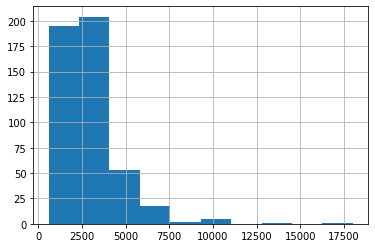

In [102]:
y_test.hist()

In [103]:
y_d = pd.DataFrame(data = y_pred)
y_t = pd.DataFrame(data = y_test)

In [104]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-87.09414673652769

In [105]:
y_t

,price
1232,4160.00000
111,1950.00000
316,1670.00000
781,1229.63501
416,2900.00000
...,...
1333,2300.00000
199,5500.00000
1692,6100.00000
1628,3100.00000


In [106]:
y_t.reset_index(inplace = True)

In [107]:
del y_t['index']

In [108]:
y_t['pred'] = y_d

In [109]:
y_t

,price,pred
0,4160.00000,5383.058105
1,1950.00000,1775.280029
2,1670.00000,2548.778076
3,1229.63501,1694.227539
4,2900.00000,2827.780029
...,...,...
474,2300.00000,2214.525146
475,5500.00000,2537.100098
476,6100.00000,4243.209961
477,3100.00000,2326.880859


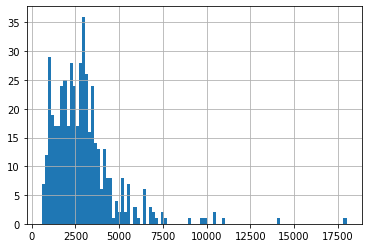

In [110]:
y_t['price'].hist(bins = 100)

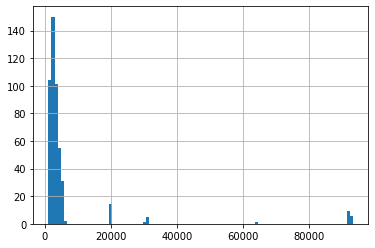

In [113]:
y_t['pred'].hist(bins = 100)

In [125]:
from sklearn.ensemble import RandomForestRegressor
md = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train, y_train)


C:\Users\huy doan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [126]:
md

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [127]:
y_prd_rf = md.predict(X_test)

In [128]:
y_prd_rf

array([4.28601205e+03, 1.92453291e+03, 2.31358602e+03, 1.61915143e+03,
       3.34848047e+03, 2.54364000e+05, 3.20846791e+03, 1.44537549e+03,
       1.17036991e+03, 1.13115550e+03, 1.87642000e+03, 2.48629901e+03,
       2.45334194e+03, 2.53176873e+03, 3.18287535e+03, 3.00993784e+03,
       2.98989596e+03, 1.84005454e+03, 4.36202982e+03, 2.56956921e+03,
       1.69683276e+03, 2.92761325e+03, 1.16470073e+03, 2.33810874e+03,
       1.05740173e+03, 1.71737092e+03, 1.34588492e+03, 1.55813017e+03,
       1.86662708e+03, 4.66519467e+03, 4.04301844e+03, 5.33661984e+03,
       2.91378093e+03, 2.69975882e+03, 2.91346142e+05, 3.82643282e+03,
       1.26475236e+03, 1.87642000e+03, 2.93646701e+03, 1.92149824e+03,
       2.70028894e+03, 3.17916475e+03, 1.10116170e+03, 1.11288138e+03,
       3.05834529e+03, 2.86585976e+03, 3.14185655e+03, 2.28018277e+03,
       2.32674883e+03, 1.24976448e+03, 3.20109105e+03, 2.76478941e+03,
       2.81993067e+03, 1.13547500e+03, 3.08890706e+03, 3.70056663e+03,
      

In [129]:
y_prd_rf = pd.DataFrame(y_prd_rf)

In [138]:
y_t['rd'] = y_prd_rf

In [141]:
y_t['rd'] = y_t['rd'].astype('float32')

In [142]:
y_t

,price,pred,rd
0,4160.00000,5383.058105,4286.012207
1,1950.00000,1775.280029,1924.532959
2,1670.00000,2548.778076,2313.585938
3,1229.63501,1694.227539,1619.151489
4,2900.00000,2827.780029,3348.480469
...,...,...,...
474,2300.00000,2214.525146,2615.908936
475,5500.00000,2537.100098,5411.626953
476,6100.00000,4243.209961,4517.830078
477,3100.00000,2326.880859,3048.307861


In [150]:
df.describe(include = 'all')

,address,balcony_direction,bedroom,direction,furniture,investor,law_doc,name,price,project,square,time,toilet,types
count,14598,8262,13449,7362,8539,12439,4858,14598,14598,14598,14132,14598,11020,14598
unique,2582,8,11,8,4847,239,697,14129,1007,558,1292,102,9,1
top,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Đông-Nam,2 PN,Tây-Bắc,Full nội thất.,Tập đoàn Vingroup,Sổ đỏ.,"Chính chủ bán gấp! Căn góc 110m2, 3PN, 2WC tạ...",Thỏa thuận,Goldmark City,70 m²,28/09/2020,2 (phòng),Bán căn hộ chung cư
freq,244,2930,6701,1754,335,1704,408,10,1947,368,363,2360,9181,14598
